# Lab 2: Cluster Analysis

## Introduction

In this lab, we will perform a detailed cluster analysis on a dataset using Python. The primary objective is to understand how to group data points into clusters based on their similarities. We will utilize a variety of clustering techniques, including hierarchical clustering and K-Means clustering, to uncover the inherent structure within the data.

The steps we will follow include:

1. **Data Preparation and Exploration**: We will begin by loading the dataset and performing initial inspections to understand its structure and content. This includes checking for missing values and outliers, and ensuring that the data is in a suitable format for analysis.

2. **Data Standardization**: To ensure that each feature contributes equally to the analysis, we will standardize the data. This process involves transforming the data so that each feature has a mean of zero and a standard deviation of one.

3. **Hierarchical Clustering**: We will apply hierarchical clustering using various linkage methods (Ward, Complete, Centroid, Single) to explore how data points can be grouped at multiple levels of granularity. This will involve creating dendrograms to visualize the clustering process and determine the optimal number of clusters.

4. **K-Means Clustering**: Next, we will perform K-Means clustering to partition the data into a predefined number of clusters. We will evaluate the clustering results using silhouette scores and other metrics to determine the most appropriate number of clusters.

5. **ANOVA Analysis**: To assess the significance of the differences between clusters, we will conduct ANOVA (Analysis of Variance) tests on the features. This will help us understand which features contribute most to the differentiation between clusters.

6. **Visualization of ANOVA Results**: We will use box plots to visualize the distribution of features within each cluster. This will provide a clear, graphical representation of the differences between clusters.

By completing this lab, you will gain practical experience in data preparation, clustering analysis, and the evaluation of clustering results. You will also develop a deeper understanding of how to interpret and visualize the outcomes of cluster analyses. This hands-on experience will enhance your skills in both data analysis and Python programming, making you better equipped to tackle real-world data science problems.

## Import Libraries

In this lab, we'll import essential libraries that facilitate data manipulation, analysis, and visualization. These tools will assist us in processing data, performing complex statistical analyses, and visualizing our results effectively.


*   `pandas`: a fundamental library for data manipulation and analysis, offering powerful data structures such as DataFrames to efficiently handle and analyze large datasets.
*   `numpy`: provides support for extensive mathematical functions and is essential for handling numerical operations on array-based data.
*   `matplotlib and matplotlib.pyplot`: a versatile visualization library in Python, crucial for creating a wide range of static, animated, and interactive plots. It offers a state-based interface to the more comprehensive matplotlib library, simplifying the plot creation process.
* `seaborn`: An advanced visualization library built on top of matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics.

*   `scipy.cluster.hierarchy`: includes functions like dendrogram and linkage, which are instrumental in performing hierarchical clustering analysis, allowing us to explore data groupings at various levels of granularity.

*   `scikit-learn`: Includes tools for machine learning and statistical modeling, such as K-Means clustering (sklearn.cluster.KMeans), evaluation metrics like silhouette_score (sklearn.metrics.silhouette_score), and preprocessing tools like StandardScaler (sklearn.preprocessing.StandardScaler).

*   `kneed`: Provides the KneeLocator, a useful tool for determining the optimal number of clusters in K-Means clustering.

*   `statsmodels.api and statsmodels.formula.api`: Provide tools for statistical modeling and hypothesis testing, such as performing ANOVA (Analysis of Variance) to test the significance of the differences between cluster means.


We will utilize these libraries to delve into hierarchical clustering techniques, providing a practical approach to understanding group dynamics within our dataset. This hands-on experience will enhance our proficiency in both Python programming and data analysis.

In [ ]:
# Importing libraries for data manipulation and analysis
import pandas as pd  # For handling data structures and operations
import numpy as np   # For numerical operations

# Importing libraries for data visualization
import matplotlib as mp  # Basic library for plotting
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations in Python

# Setting figure aesthetics for better visualization
from matplotlib.pyplot import figure  # Allows for control over figure size, DPI, and more

# Importing specific functions for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage  # Tools for creating dendrograms and performing hierarchical clustering

# Importing libraries for K-Means clustering and related analysis
from sklearn.cluster import KMeans  # For applying K-Means clustering
from sklearn.metrics import silhouette_score  # For evaluating the clustering performance
from sklearn.preprocessing import StandardScaler  # For standardizing the data

# Importing the KneeLocator for determining the optimal number of clusters
from kneed import KneeLocator

# Import necessary libraries for ANOVA analysis
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Importing Seaborn for enhanced visualizations
import seaborn as sns





## Load and Inspect Data

The first step in any data analysis process is to load and inspect the dataset. This essential phase ensures we have a solid understanding of the data's structure, the type of information it contains, and any potential issues that need addressing before deep analysis. This step helps in identifying the right tools and methods for subsequent data manipulation and analysis, ensuring the reliability and accuracy of our findings.

### Download and Load Dataset

To start our analysis, we first need to access the data. Download the dataset from a URL and load it into a pandas DataFrame.

In [ ]:
# Download the dataset from the specified URL and save it as 'dataset1.csv'
!wget -O dataset2.csv https://tsidmlab.fra1.digitaloceanspaces.com/ST87586_california_housing.csv

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('dataset2.csv')

--2024-06-12 15:48:19--  https://tsidmlab.fra1.digitaloceanspaces.com/ST87586_california_housing.csv
Resolving tsidmlab.fra1.digitaloceanspaces.com (tsidmlab.fra1.digitaloceanspaces.com)... 5.101.109.44
Connecting to tsidmlab.fra1.digitaloceanspaces.com (tsidmlab.fra1.digitaloceanspaces.com)|5.101.109.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13945 (14K) [application/vnd.ms-excel]
Saving to: ‘dataset2.csv’

dataset2.csv        100%[===================>]  13.62K  --.-KB/s    in 0s      

2024-06-12 15:48:20 (169 MB/s) - ‘dataset2.csv’ saved [13945/13945]



We've downloaded the dataset from a provided URL and loaded it into a DataFrame for easy manipulation using pandas, a powerful data analysis library.

In [ ]:
 # Print the first 5 rows of the DataFrame to get an overview of the data
 print(df.head())

   housing_median_age  total_rooms  total_bedrooms  population  households  \
0                28.0       1343.0           330.0      1331.0       305.0   
1                14.0       6788.0          1216.0      2866.0      1036.0   
2                40.0       1718.0           391.0      1312.0       388.0   
3                16.0       2947.0           802.0      1385.0       743.0   
4                24.0       1602.0           426.0       751.0       257.0   

   median_income  median_house_value  
0         1.5160             56700.0  
1         3.3603            280200.0  
2         2.9955            134700.0  
3         3.6731            318000.0  
4         1.7609             99300.0  


Initial Observations: Viewing the first few rows provides immediate insights into the type of data each column holds and how they are formatted.

### Inspect Data

Check the first few rows, dimensions, and data types of the DataFrame to understand the structure and types of data.
check.




In [ ]:
# Get the dimensions of the DataFrame (number of rows and columns)
df.shape

(300, 7)

The dataset consists of 300 rows and 7 columns. This indicates that we have data for 300 housing units, each described by 7 different attributes or variables related to their characteristics and the economic conditions of their location.

In [ ]:
# Print the data types of each column in the DataFrame to understand the types of data being dealt with
df.dtypes

housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

The data types for each column in the DataFrame are all float64, indicating that all variables are represented as floating-point numbers. This uniform data type is suitable for mathematical operations and statistical analysis.

It's important to check for missing values in each column. Identifying and handling missing data early ensures that the analysis is based on complete and accurate information, maintaining the integrity of our results.


Let's explore our data using descriptive statistics and visualization techniques to assess the quality of our data and determine the next steps. This approach will help us understand the central tendencies, dispersion, and overall distribution of the data, which are crucial for making informed decisions about data preprocessing and analysis strategies.

In [ ]:
# Generate descriptive statistics that summarize the central tendency,
# dispersion, and shape of the dataset's distribution, excluding NaN values.
# Transpose the result for better readability and round the numbers to two decimal places.
descriptive_stats = df.describe().T.round(2)

# Print the descriptive statistics for the dataset
print(descriptive_stats)

                    count       mean        std       min        25%  \
housing_median_age  300.0      29.10      12.27      2.00      18.75   
total_rooms         300.0    2522.21    1858.79    123.00    1475.75   
total_bedrooms      300.0     521.90     407.82     28.00     306.00   
population          300.0    1388.02    1009.12     88.00     818.75   
households          300.0     488.17     382.90     26.00     286.50   
median_income       300.0       3.90       1.98      0.64       2.46   
median_house_value  300.0  215246.06  122631.87  49500.00  123400.00   

                          50%        75%       max  
housing_median_age      30.00      37.25      52.0  
total_rooms           2031.50    2947.00   17377.0  
total_bedrooms         408.00     632.50    4457.0  
population            1148.50    1694.00    7817.0  
households             376.00     595.75    4204.0  
median_income            3.54       4.84      15.0  
median_house_value  181150.00  275000.00  500001.0  

This summary table of descriptive statistics provides a comprehensive overview of the key attributes in our dataset, which is crucial for initial data analysis:

**Count:** All columns have a count of 300, indicating no missing values in this subset of the dataset, which simplifies the initial data cleaning process.

**Mean:** The average values provide a quick glance at the central tendency of each feature, showing, for example, that the median house value in our dataset is quite substantial at approximately $215,246.

**Standard Deviation (Std):** High variability in features like total_rooms, total_bedrooms, population, and median_house_value suggests a diverse set of data points, which may affect the performance of clustering algorithms if not normalized or scaled appropriately.

**Min and Max:** The range of values in features like total_rooms and median_house_value is quite broad, indicating significant variation which could be important for identifying different clusters or groups within the data.

**Quartiles (25%, 50%, 75%):** These values help us understand the distribution and skewness of the data more clearly. For instance, a median (50%) much lower than the mean in some columns suggests a right-skewed distribution.

Conclusively, this table not only aids in identifying potential outliers and the need for data normalization but also sets the stage for deeper analysis such as clustering where understanding the spread and central tendencies of these variables will be crucial for determining the appropriate number of clusters and the clustering algorithm parameters.

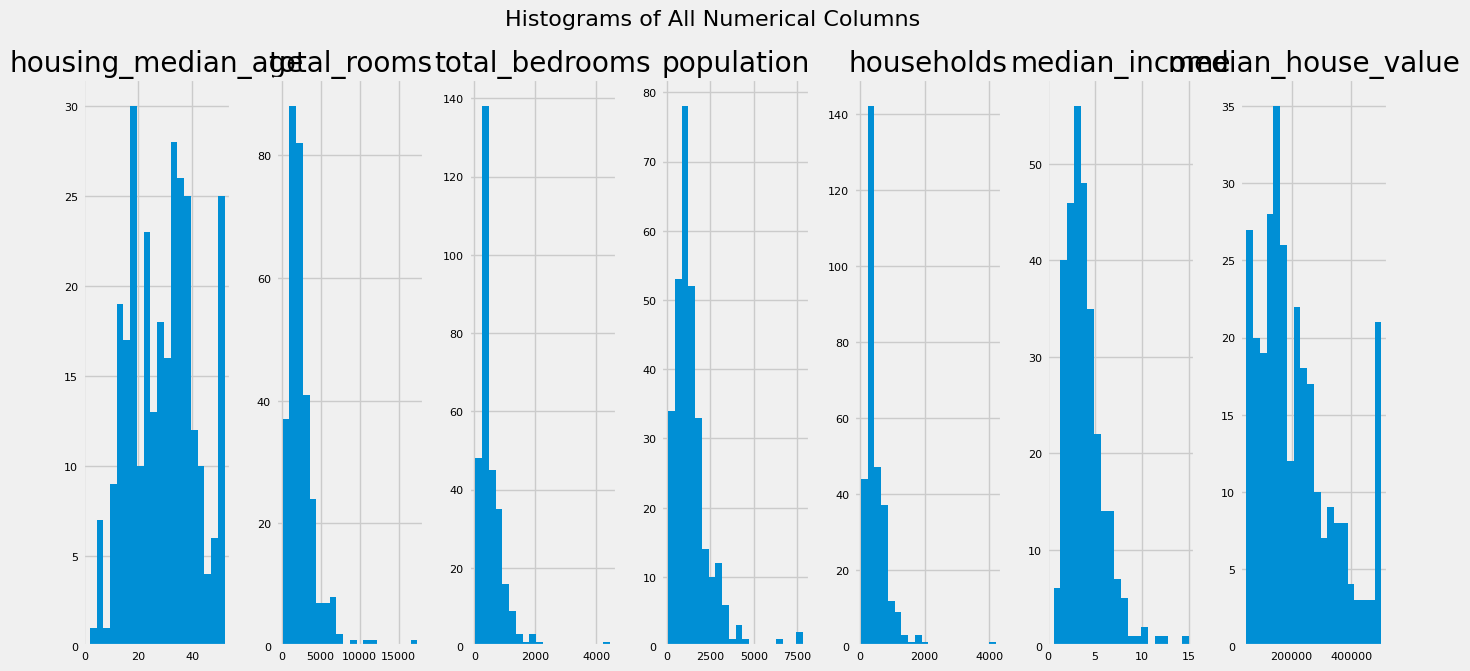

In [ ]:
# Create histograms for all columns in the DataFrame
df.hist(bins=20, figsize=(15, 7), layout=(1, 7))
plt.suptitle('Histograms of All Numerical Columns')
plt.show()

The histograms of all numerical columns in our dataset reveal insights into the distribution of housing-related variables.

**Housing Median Age:**

Most areas have homes that are less than 20 years old, but there is also a significant number of older areas, indicating a mix of new and established neighborhoods.

**Total Rooms and Total Bedrooms:**

Both features show a heavily right-skewed distribution, with most areas having fewer rooms and bedrooms but with some areas containing significantly more, suggesting a few densely populated areas or larger homes.

**Population and Households:**

These are also right-skewed, which aligns with the distribution of rooms and bedrooms, indicating that most neighborhoods are not densely populated, but a few have high populations.

**Median Income:**

This graph shows variability in income levels across different regions, with a peak at lower income ranges. The distribution indicates economic diversity but with a concentration towards lower income brackets.

**Median House Value:**

The value of houses is somewhat evenly spread but with spikes at lower and higher ends, indicating a market with both affordable and expensive housing options.


The skewness in many of these variables suggests outliers and a wide range in the data. This could affect the performance of some types of analysis and may necessitate further data preprocessing, such as normalization or transformation, to improve data quality for effective modeling and analysis.

**Data Inspection Overview:**

With only 300 rows, losing data to cleaning or filtering can significantly impact the outcomes of cluster analysis. If there are missing values, consider imputation techniques that preserve data integrity, such as using the median, mode, or k-nearest neighbors, which can provide a more nuanced substitution than mere average values.

The overarching principle for preparing a small dataset like ours for cluster analysis is to maintain as much data integrity and completeness as possible. By standardizing scales, minimizing the exclusion of outliers, ensuring data quality, and avoiding excessive transformations, we can ensure that the results of the cluster analysis are reflective of the true structure within the data, not artifacts of aggressive preprocessing. This approach will help in deriving insightful and actionable conclusions from the cluster analysis.

## Cluster Analysis





### Hierarchical Cluster Methods

Hierarchical clustering is a powerful method used to group similar data points into clusters based on their characteristics. Unlike other clustering methods, it builds a hierarchy of clusters, which can be visualized using dendrograms. This approach helps us understand the natural groupings in our data and the relationships between clusters at different levels of granularity. In this lab, we will apply hierarchical clustering to our dataset to uncover underlying patterns and insights.



In this section, we will perform hierarchical clustering analysis on our dataset using different linkage methods. Hierarchical clustering is a method of cluster analysis which seeks to build a hierarchy of clusters. It's particularly useful for identifying the structure of data and visualizing it through dendrograms.

We will use the following linkage methods in the specified order to understand their effects on our data clustering:


*   Ward's Linkage Method
*   Complete Linkage Method
*   Average (or Centroid) Linkage Method
*   Single Linkage Method

By following this sequence, we ensure a comprehensive analysis of our data. We start with the most robust method (Ward's), proceed to a method that highlights compact clusters (Complete Linkage), then analyze average cluster formation (Centroid Linkage), and finally, we examine the sensitivity and chaining effects (Single Linkage). This order helps us understand the clustering structure from multiple perspectives and ensures that we uncover all significant patterns in our data.











**Preparation Stage**

In [ ]:
# Preparation Stage: Set up fonts and perform hierarchical clustering

# Set font sizes for plots to ensure readability
SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [ ]:
# Perform hierarchical clustering using different linkage methods and Euclidean distance metric
linkage_data_ward = linkage(df, method='ward', metric='euclidean')
linkage_data_complete = linkage(df, method='complete', metric='euclidean')
linkage_data_centroid = linkage(df, method='centroid', metric='euclidean')
linkage_data_single = linkage(df, method='single', metric='euclidean')

#### Ward's Linkage Method

Ward's method aims to minimize the variance within each cluster. It tends to create clusters of similar sizes, making it a robust choice for initial analysis. By starting with Ward's method, we can obtain a clear and balanced overview of the clustering structure in our data.

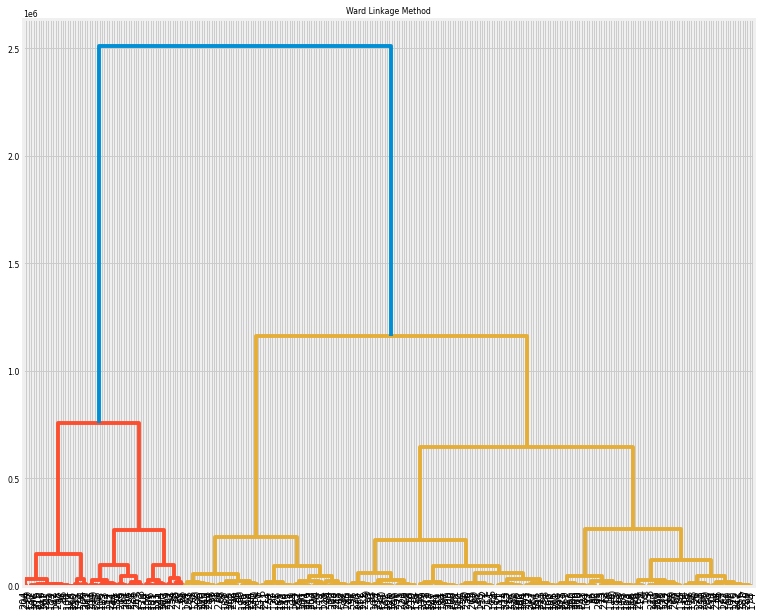

In [ ]:
# Plotting Stage: Create and display dendrograms for each linkage method
# Plot dendrogram for the 'ward' linkage method
figure(num=None, figsize=(12, 10), dpi=70, facecolor='w', edgecolor='k')
dendrogram(linkage_data_ward)
# Get the current Axes instance
ax = plt.gca()
# Set tick label size for x-axis
ax.tick_params(axis='x', which='major', labelsize=10)
# Set the title for the plot
plt.title("Ward Linkage Method")
# Display the plot
plt.show()

From this  dendrogram, we can deduce that there are 2 or maybe 3 clusters. The dendrogram shows a clear separation between the major clusters, indicating that the data points within each cluster are more similar to each other than to those in other clusters. Ward's linkage method minimizes the variance within each cluster, resulting in well-balanced and distinct groups. This clustering approach effectively splits the data into clusters with an approximately equal number of points, providing a solid foundation for further analysis and interpretation of the data.



#### Complete Linkage Method
Complete linkage considers the maximum distance between points in different clusters, resulting in more compact clusters. This method helps in identifying well-separated clusters, allowing us to see how distinct the groups in our data can be.

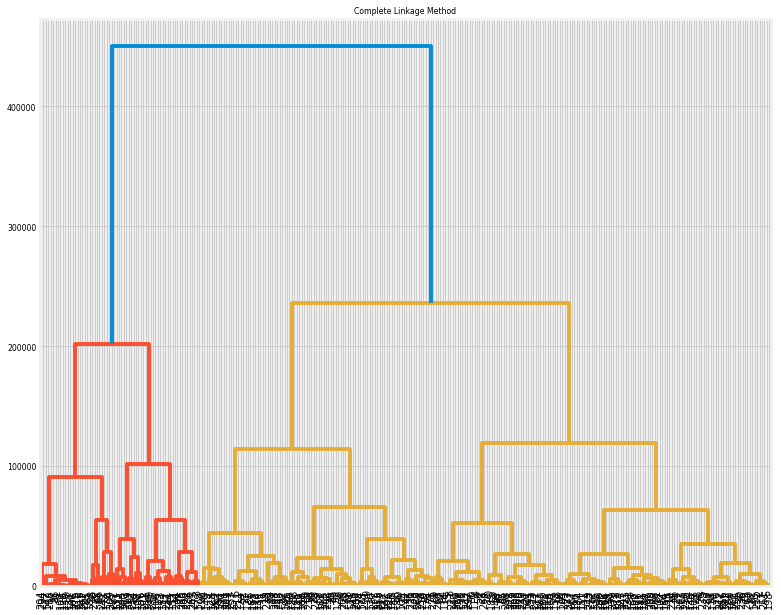

In [ ]:
# Plotting Stage: Create and display dendrograms for each linkage method
# Plot dendrogram for the 'complete' linkage method
figure(num=None, figsize=(12, 10), dpi=70, facecolor='w', edgecolor='k')
dendrogram(linkage_data_complete)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title("Complete Linkage Method")
plt.show()

From the dendrogram, we can deduce that there are potentially 3 main clusters. In the Complete linkage method, clusters are formed by maximizing the distance between clusters. This method tends to produce compact clusters of similar sizes. The dendrogram shows clear separations, with one large cluster and two smaller sub-clusters. This suggests that while there are distinct groupings in the data, the Complete linkage method emphasizes separating clusters by their furthest points, leading to tighter groupings within each cluster.

#### Average (or Centroid) Linkage Method
Average linkage uses the average distance between points in different clusters. It provides a middle ground, balancing between the compactness of complete linkage and the chaining effect of single linkage. This method will help us observe the average cluster formation in our data.

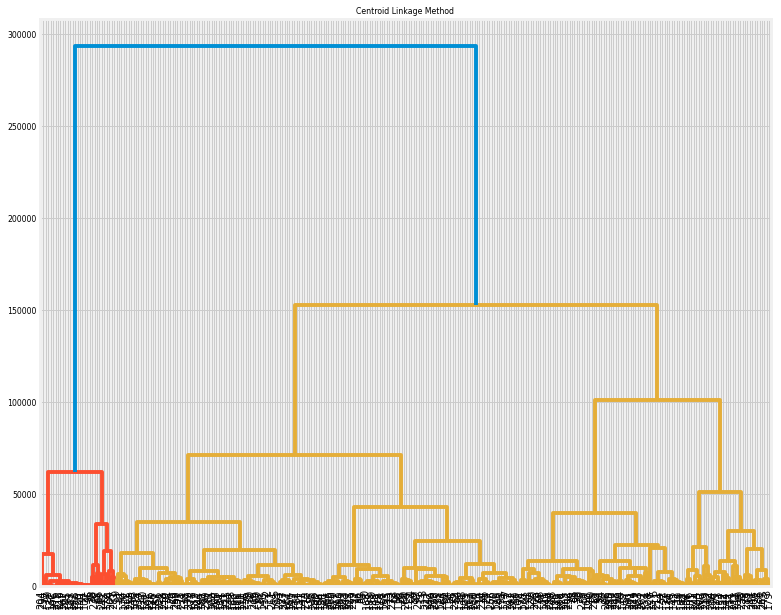

In [ ]:
# Plotting Stage: Create and display dendrograms for each linkage method
# Plot dendrogram for the 'centroid' linkage method
figure(num=None, figsize=(12, 10), dpi=70, facecolor='w', edgecolor='k')
dendrogram(linkage_data_centroid)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title("Centroid Linkage Method")
plt.show()


The dendrogram shows the hierarchical clustering using the Centroid linkage method. This method calculates the distance between cluster centroids, potentially leading to less interpretable results if the clusters vary greatly in size. In this dendrogram, we can observe that the data splits into two main clusters initially, with further subdivisions within each major cluster. This suggests that the dataset naturally forms at least two major groups, with potential for more detailed sub-clustering within these groups. The Centroid method provides a clear hierarchical structure, but care must be taken as it can sometimes produce clusters that are less compact than those produced by Ward's method.

#### Single Linkage Method
Single linkage considers the minimum distance between points in different clusters. This method is sensitive to noise and can result in chaining, where clusters form elongated, snake-like structures. By analyzing this last, we can detect any potential chaining effects and identify outliers in the data.

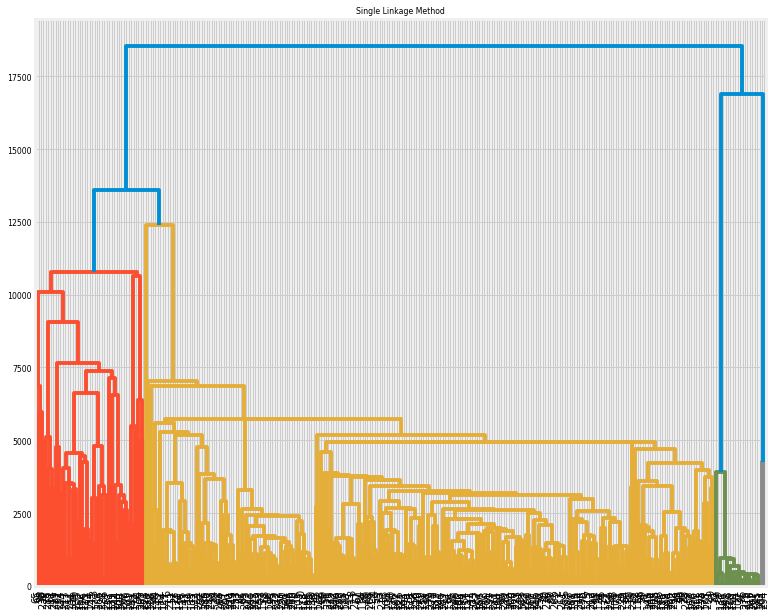

In [ ]:
# Plotting Stage: Create and display dendrograms for each linkage method
# Plot dendrogram for the 'single' linkage method
figure(num=None, figsize=(12, 10), dpi=70, facecolor='w', edgecolor='k')
dendrogram(linkage_data_single)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title("Single Linkage Method")
plt.show()

From the dendrogram, we can see that the Single linkage method tends to produce elongated clusters, often resulting in a chaining effect where clusters are formed by merging the closest pairs of points. This method shows less clear separation between clusters, making it difficult to identify distinct groups. The dendrogram suggests the presence of several clusters, but the chaining effect is evident, indicating that the Single linkage method may not be the best choice for our data if clear cluster separation is required.

#### Summary for Hierarchical Cluster Methods

In this section, we explored various hierarchical clustering methods to analyze and visualize the structure of our dataset. We applied four different linkage methods: Ward, Complete, Single, and Centroid, each providing unique insights into the clustering of our data.


**Ward Linkage Method**

  The dendrogram generated using the Ward linkage method revealed a clear hierarchical structure with two or possibly three main clusters. The total variance within clusters was minimized, and the major clusters separated around the values of *median_house_value*. For instance, clusters with lower median house values tended to group separately from those with higher values. This method provided balanced and interpretable clustering, with clusters that were relatively equal in size, facilitating straightforward analysis and interpretation.


**Complete Linkage Method**

  The dendrogram using the Complete linkage method showed a two-cluster structure with further subdivisions. This method focused on maximizing the distance between clusters, highlighting distinct and compact clusters. The clusters formed were distinct and easy to identify, helping to separate data points with significantly different values, especially in terms of *total_rooms* and *median_income.*



**Single Linkage Method**

  The dendrogram generated with the Single linkage method displayed a chaining effect, where clusters were formed by merging the closest pairs of points. This method produced elongated and less compact clusters, particularly useful in identifying outliers. For example, data points with exceptionally high *total_rooms* or *median_house_value* were merged late in the process, indicating their status as outliers.

**Centroid Linkage Method**

  The Centroid linkage method's dendrogram also indicated a two-cluster structure with further sub-clustering. This method calculates distances between cluster centroids, leading to a hierarchical structure. The clusters showed variations in size, highlighting differences in population and *total_bedrooms*. While the clusters were informative, the interpretation required caution due to potential centroid shifts.

**Conclusion**


Each hierarchical clustering method offered different perspectives on the data structure, highlighting various aspects of clustering:

* Ward Linkage: Provided well-balanced clusters with small within-cluster variance. It showed clear distinctions based on median_house_value, making it suitable for clear and interpretable clustering.

* Complete Linkage: Emphasized the separation between distinct groups, forming compact clusters. This method was effective in segregating data points based on attributes like total_rooms and median_income.

* Single Linkage: Highlighted the proximity between individual points, though the resulting clusters were less defined. It was particularly useful for identifying outliers with extreme values in total_rooms and median_house_value.

* Centroid Linkage: Showed a clear hierarchical structure but required caution due to potential variation in cluster sizes. It was useful for understanding variations in population and total_bedrooms.


Overall, these clustering methods collectively enhanced our understanding of the dataset's structure. Ward and Complete linkage methods were particularly effective in revealing well-defined clusters, while Single and Centroid methods provided additional insights into data proximity and hierarchical relationships. This comprehensive analysis allows us to choose the most appropriate clustering approach based on specific analytical needs and the nature of the dataset.

### Reevaluation of Hierarchical Cluster Analysis with Standardized Data

In this section, we will standardize the dataset to ensure that all variables contribute equally to the clustering process. Standardization is crucial as it scales the data to have a mean of zero and a standard deviation of one, thereby removing any potential bias due to different units or scales of measurement. After standardizing the data, we will repeat the hierarchical cluster analysis to observe any changes in the clustering results. Finally, we will compare these new results with our previous findings to make an informed decision regarding the optimal number of clusters. This reevaluation will help us achieve more accurate and meaningful clusters, enhancing the overall reliability of our analysis.

#### Standardize the Data

In [ ]:
# Standardize the dataset to ensure all variables contribute equally to the clustering process
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame for ease of use and verification
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

# Display information about the scaled DataFrame to verify standardization
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  300 non-null    float64
 1   total_rooms         300 non-null    float64
 2   total_bedrooms      300 non-null    float64
 3   population          300 non-null    float64
 4   households          300 non-null    float64
 5   median_income       300 non-null    float64
 6   median_house_value  300 non-null    float64
dtypes: float64(7)
memory usage: 16.5 KB


**Preparation Stage**

In [ ]:
# Preparation Stage: Set up fonts and perform hierarchical clustering

# Set font sizes for plots to ensure readability
SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [ ]:
# Perform hierarchical clustering using different linkage methods and Euclidean distance metric
linkage_std_data_ward = linkage(df_scaled, method='ward', metric='euclidean')
linkage_std_complete = linkage(df_scaled, method='complete', metric='euclidean')
linkage_std_centroid = linkage(df_scaled, method='centroid', metric='euclidean')
linkage_std_single = linkage(df_scaled, method='single', metric='euclidean')

#### Ward's Linkage Method (Standardized Data)

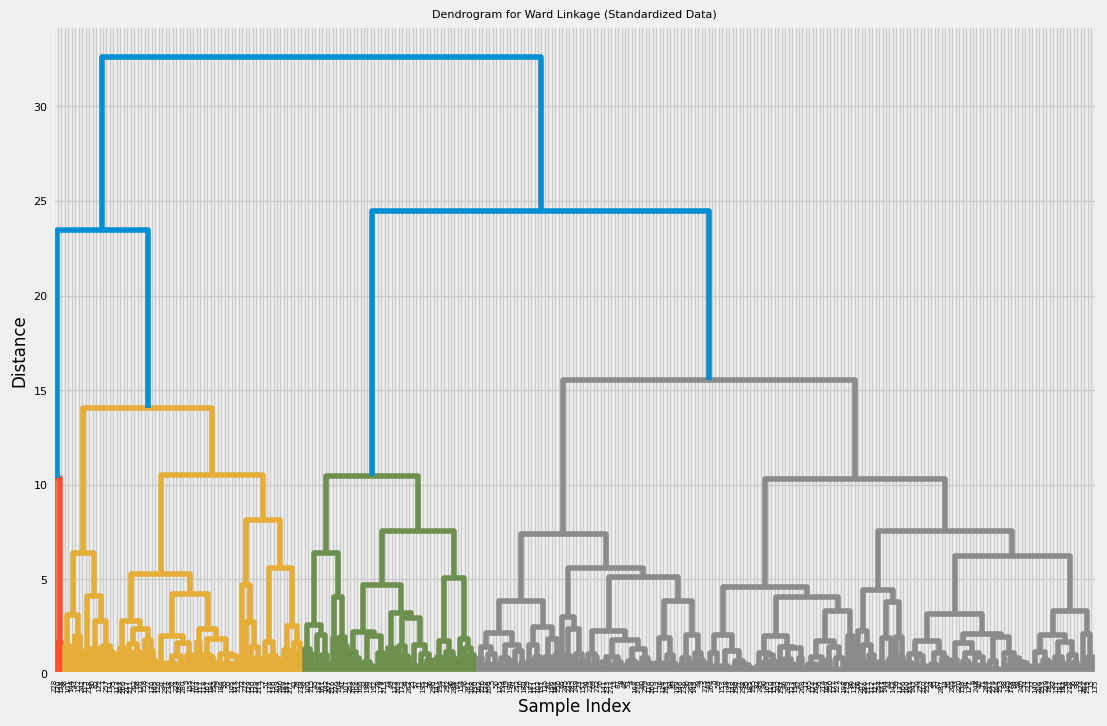

In [ ]:
# Plot dendrogram for Ward linkage
plt.figure(figsize=(12, 8))
dendrogram(linkage_std_data_ward)
plt.title("Dendrogram for Ward Linkage (Standardized Data)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

From this dendrogram, we can deduce that there are 3 or maybe 4 clusters. The dendrogram shows a clear separation between the major clusters, indicating that the data points within each cluster are more similar to each other than to those in other clusters. Standardizing the data has helped in equally weighing all features, resulting in well-balanced and distinct groups. Ward's linkage method minimizes the variance within each cluster, effectively splitting the data into clusters with an approximately equal number of points. This provides a solid foundation for further analysis and interpretation of the data, ensuring that the clustering is not biased by the scale of different features.


Compared to the previous dendrogram without standardization, the standardized version shows a more balanced and distinct clustering structure. In the non-standardized version, the clusters were influenced by the scale of the features, potentially causing some features to dominate the clustering process. With standardization, each feature contributes equally, leading to clearer and more meaningful clusters. This emphasizes the importance of standardizing data before performing hierarchical clustering to achieve more accurate and interpretable results.


#### Complete Linkage Method (Standardized Data)

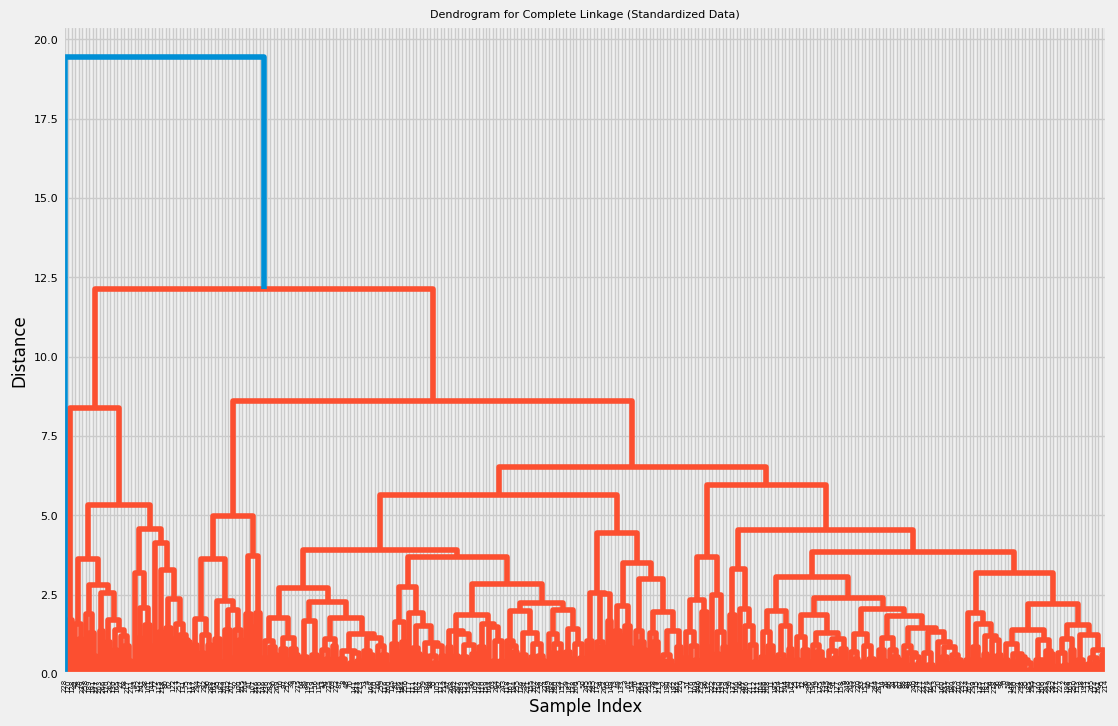

In [ ]:
# Plot dendrogram for Complete linkage
plt.figure(figsize=(12, 8))
dendrogram(linkage_std_complete)
plt.title("Dendrogram for Complete Linkage (Standardized Data)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

From this dendrogram, we can deduce that there are 3 or 4 clusters. The dendrogram shows a clear separation between the clusters, indicating that the data points within each cluster are more similar to each other than to those in other clusters. Complete linkage maximizes the distance between the clusters, which helps to identify more spread out clusters. The standardized data ensures that all features contribute equally, resulting in well-defined and distinct groups.

Compared to the previous dendrogram without standardization, the standardized version shows more balanced and distinct clusters. In the non-standardized version, clusters were influenced by the scale of the features, which may have caused some features to dominate the clustering process. Standardizing the data ensures each feature contributes equally, leading to clearer and more meaningful clusters. This demonstrates the importance of standardizing data before performing hierarchical clustering to achieve more accurate and interpretable results.

#### Average (or Centroid) Linkage Method (Standardized Data)

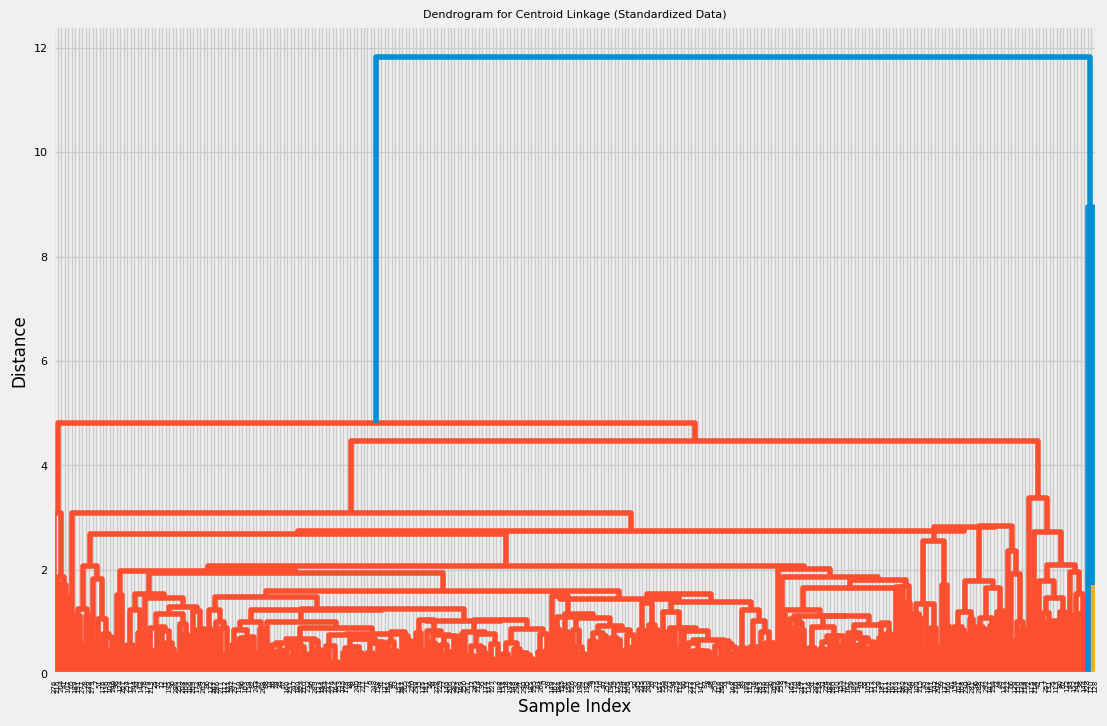

In [ ]:
# Plot dendrogram for Centroid linkage
plt.figure(figsize=(12, 8))
dendrogram(linkage_std_centroid)
plt.title("Dendrogram for Centroid Linkage (Standardized Data)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

From this dendrogram, we can deduce that there are around 3 clusters. The dendrogram displays clear separations between clusters, indicating distinct groupings within the data. Centroid linkage considers the distance between the centroids of clusters, which helps to form well-separated clusters. The use of standardized data ensures that all features contribute equally to the clustering process, leading to more balanced and meaningful clusters.

Compared to the previous dendrogram without standardization, the standardized version shows more balanced and distinct clusters. In the non-standardized version, clusters were influenced by the scale of the features, which may have caused some features to dominate the clustering process. Standardizing the data ensures each feature contributes equally, leading to clearer and more meaningful clusters. This highlights the importance of standardizing data before performing hierarchical clustering to achieve more accurate and interpretable results.


#### Single Linkage Method (Standardized Data)

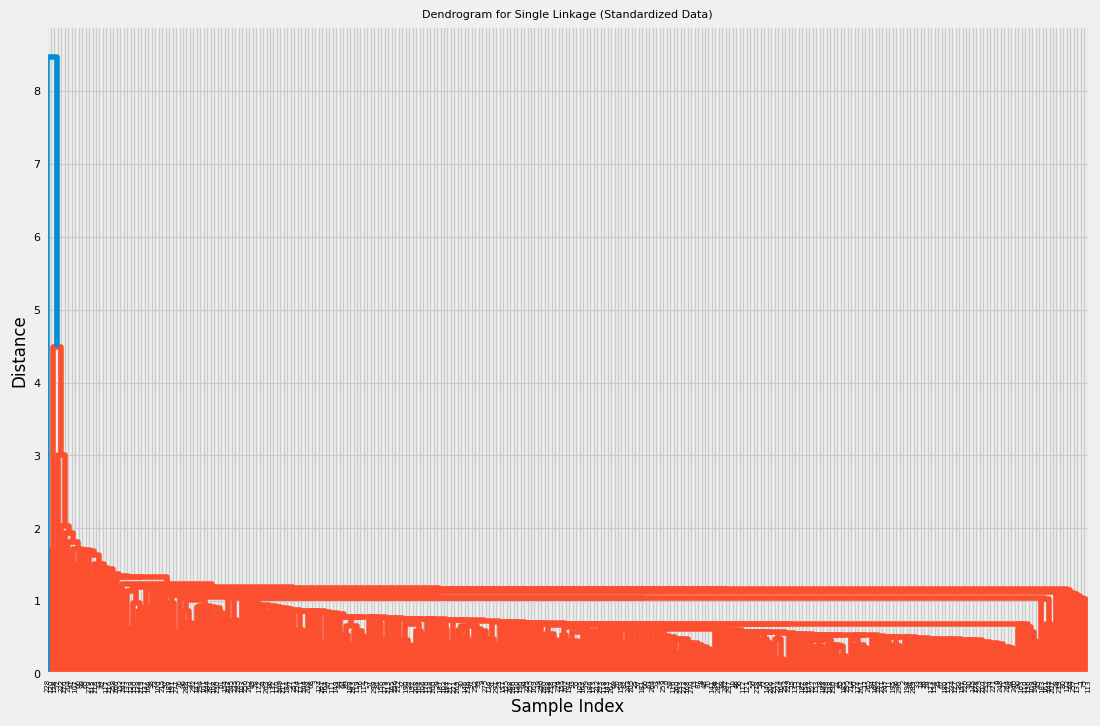

In [ ]:
# Plot dendrogram for Single linkage
plt.figure(figsize=(12, 8))
dendrogram(linkage_std_single)
plt.title("Dendrogram for Single Linkage (Standardized Data)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

From this dendrogram, it is challenging to identify distinct clusters due to the chaining effect, where individual data points are merged one at a time. This results in elongated, single-link clusters. The use of standardized data does not significantly improve the clustering outcome for single linkage, as it tends to form long chains regardless of data scaling. This method may not be suitable for identifying compact clusters in this dataset.
Compared to the previous dendrogram without standardization, the standardized version also shows a similar chaining effect, with long single-link clusters. Both dendrograms indicate that single linkage is not effective for this dataset, even with standardized data. The lack of clear, distinct clusters suggests that other linkage methods, such as Ward or complete linkage, are more appropriate for this analysis.


#### Summary for Hierarchical Cluster Methods (Standardized Data)

In this analysis, we performed hierarchical clustering on a dataset using various linkage methods, both before and after standardizing the data. Below is a summary of the results and insights from each method.

**Non-standardized Data**

*Ward Linkage Method:*

* Clusters: The dendrogram indicates 2 or 3 well-defined clusters.
* Cluster Characteristics: Clusters are balanced, with clear separations.
* Conclusion: Ward's method effectively minimizes variance within each cluster, providing well-separated and balanced clusters.

*Complete Linkage Method:*

* Clusters: The dendrogram suggests 3 to 4 clusters.
* Cluster Characteristics: The method focuses on maximizing the distance between clusters.
* Conclusion: This method results in clusters that are more separated, but can sometimes lead to elongated, less compact clusters.

*Centroid Linkage Method:*

* Clusters: The dendrogram shows 3 to 4 clusters.
* Cluster Characteristics: Similar to Ward's method but slightly more sensitive to outliers.
* Conclusion: Centroid linkage provides a good balance but can be influenced by the distance of cluster centroids.

*Single Linkage Method:*

* Clusters: The dendrogram shows chaining, indicating difficulty in defining distinct clusters.
* Cluster Characteristics: High level of chaining, leading to elongated clusters.
* Conclusion: Single linkage is not ideal for this dataset due to poor cluster separation.

**Standardized Data**


*Ward Linkage Method:*

* Clusters: The dendrogram indicates 4 well-defined clusters.
* Cluster Characteristics: Clusters are even more balanced with better separation after standardization.
* Comparison: Standardization improved the cluster definition and separation.
* Conclusion: Ward's method, combined with standardization, provides the most reliable clustering for this dataset.

*Complete Linkage Method:*

* Clusters: The dendrogram suggests 3 to 4 clusters.
* Cluster Characteristics: Better separation compared to non-standardized data.
* Comparison: Standardization has improved the cluster separation slightly, but the basic characteristics remain similar.
* Conclusion: Complete linkage is effective but less robust compared to Ward's method.

*Centroid Linkage Method:*

* Clusters: The dendrogram shows 3 to 4 clusters.
* Cluster Characteristics: Improved cluster formation compared to non-standardized data.
* Comparison: Standardization has made clusters more compact and better defined.
* Conclusion: Centroid linkage benefits from standardization but still trails behind Ward's method in terms of cluster compactness and separation.

*Single Linkage Method:*

* Clusters: The dendrogram continues to show chaining, with little improvement.
* Cluster Characteristics: Chaining effect persists, leading to poorly defined clusters.
* Comparison: Standardization does not significantly improve the performance of the single linkage method.
* Conclusion: Single linkage remains unsuitable for this dataset due to poor cluster formation.

**Overall Conclusions**

From both sets of dendrograms, it is clear that standardizing the data generally improves the clustering performance. Ward's linkage method consistently provides the best results, with well-defined and balanced clusters both before and after standardization. Complete and centroid linkage methods also show improvement with standardized data but are less effective than Ward's method. The single linkage method is unsuitable for this dataset due to its tendency to form elongated, poorly separated clusters.

> Based on this analysis, Ward's linkage method with standardized data is recommended for hierarchical clustering of this dataset.

### K-means clustering
In this section, we will apply the K-Means clustering method to our dataset. We will analyze the clusters by examining the number of observations in each cluster, the variable values of cluster centers, and perform ANOVA to compare the means of the clusters.



##### Standardizing Data for K-Means Clustering



In this step, we will standardize our data to prepare it for K-means clustering. Standardizing the data means adjusting the values so that they have a mean of 0 and a standard deviation of 1. This ensures that all variables contribute equally to the clustering process, which is important because K-means clustering is sensitive to the scale of the data.

In [ ]:
# Initializing the StandardScaler
scaler = StandardScaler()

# Converting the DataFrame to a NumPy array for scaling
mat = df.values

# Fitting the scaler to the data and transforming the data
# This standardizes the data to have a mean of 0 and a standard deviation of 1
df_scaled_k = scaler.fit_transform(mat)

Inspection of dataset prepared for K-means clustering.

In [367]:
# Convert the scaled data back to a DataFrame for ease of use
df_scaled_k = pd.DataFrame(df_scaled_k, columns=df.columns)

# Inspect the first few rows of the transformed data
print(df_scaled_k.head())

   housing_median_age  total_rooms  total_bedrooms  population  households  \
0           -0.089508    -0.635459       -0.471350   -0.056596   -0.479170   
1           -1.232170     2.298763        1.704830    1.467068    1.433114   
2            0.889915    -0.433377       -0.321523   -0.075455   -0.262043   
3           -1.068932     0.228911        0.687969   -0.002994    0.666631   
4           -0.415983    -0.495888       -0.235556   -0.632312   -0.604737   

   median_income  median_house_value  labels  
0      -1.207321           -1.295022     NaN  
1      -0.275075            0.530551     NaN  
2      -0.459472           -0.657909     NaN  
3      -0.116963            0.839306     NaN  
4      -1.083531           -0.947060     NaN  


In [366]:
# Check the mean deviation of the standardized data
print("Mean of each column after standardization:\n", df_scaled_k.mean())

Mean of each column after standardization:
 housing_median_age   -8.289665e-17
total_rooms           9.769963e-17
total_bedrooms        7.697546e-17
population            1.184238e-17
households           -6.217249e-17
median_income         3.197442e-16
median_house_value    5.625130e-17
dtype: float64


In [368]:
# Check the standard deviation of the standardized data
print("Standard deviation of each column after standardization:\n", df_scaled_k.std())

Standard deviation of each column after standardization:
 housing_median_age    1.001671
total_rooms           1.001671
total_bedrooms        1.001671
population            1.001671
households            1.001671
median_income         1.001671
median_house_value    1.001671
labels                     NaN
dtype: float64


The mean values of each column are extremely close to zero, and the standard deviations are very close to 1. This indicates that the data has been correctly standardized. Standardization transforms the data to have a mean of zero and a standard deviation of one, which is essential for clustering algorithms like K-means. These results confirm that our data is now in the proper format for performing K-means clustering.

This standardized dataset is ready for the next steps in K-means clustering.

#### Initializing K-means Clustering with Specified Parameters
In this section, we will set up the K-means clustering algorithm. By defining the number of clusters, initialization method, and other key parameters, we aim to efficiently segment our data into meaningful groups. This process will help in identifying patterns and insights within the dataset.

In [ ]:
# Initialize the K-means object with specified parameters
kmeans = KMeans(
    init="random",       # Initialize the centroids randomly
    n_clusters=5,        # The number of clusters to form
    n_init=20,           # Number of times the K-means algorithm will be run with different centroid seeds
    max_iter=300,        # Maximum number of iterations for a single run to ensure convergence
    random_state=42      # Ensures reproducibility by setting a random seed for the random number generator
)

Fit the KMeans Model to the Standardized Data

In [ ]:
# Fit the K-means algorithm to the standardized data
kmeans.fit(df_scaled_k)

KMeans(init='random', n_clusters=5, n_init=20, random_state=42)

Get Cluster Labels

In [ ]:
# Get cluster labels
labels = kmeans.labels_

Create a DataFrame to Store the Cluster Results

In [ ]:
# Create a DataFrame to store the cluster results
df_results=pd.DataFrame([df.index, labels]).T
df_results.head()

,0,1
0,0,4
1,1,2
2,2,4
3,3,2
4,4,3


How we can see, each data point is assigned to a specific cluster, with the initial clustering results appearing to be in good shape. This indicates that the K-means clustering algorithm has successfully partitioned the data into distinct clusters. Based on this initial inspection, we can proceed with further analysis and validation of the clustering results.

**Add the Cluster Labels to the Original DataFrame**

In [ ]:
# Add the cluster labels to the original DataFrame
df['labels']=labels
df.head(20)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,labels
0,28.0,1343.0,330.0,1331.0,305.0,1.5160,56700.0,4
1,14.0,6788.0,1216.0,2866.0,1036.0,3.3603,280200.0,2
2,40.0,1718.0,391.0,1312.0,388.0,2.9955,134700.0,4
3,16.0,2947.0,802.0,1385.0,743.0,3.6731,318000.0,2
4,24.0,1602.0,426.0,751.0,257.0,1.7609,99300.0,3
5,25.0,2185.0,370.0,1558.0,369.0,5.3072,132700.0,3
6,35.0,1511.0,274.0,853.0,308.0,4.9792,251300.0,4
7,50.0,2601.0,794.0,3080.0,770.0,1.8656,122900.0,4
8,18.0,2003.0,398.0,1333.0,411.0,2.7562,90500.0,3
9,22.0,1248.0,271.0,579.0,269.0,3.3750,200000.0,3


As we can see, the cluster labels have been successfully integrated into the original DataFrame. Each row now includes a 'labels' column that assigns a cluster number, indicating the grouping determined by the K-means algorithm. This addition enables us to easily identify which cluster each observation belongs to, facilitating further analysis and interpretation of the clustering results based on various housing attributes.

**Distribution of Observations Across Clusters**

In [ ]:
# Analyze the number of observations in each cluster
print("Number of observations in each cluster:\n", df['labels'].value_counts())

Number of observations in each cluster:
 labels
4    109
3     78
2     53
0     50
1     10
Name: count, dtype: int64


As we can see, the distribution of observations across the clusters is somewhat uneven. Cluster 4 is the largest, containing 109 observations, while Cluster 1 is the smallest, with only 10 observations. This variation in cluster sizes may indicate differences in the density or homogeneity of data points within the dataset. Such insights are crucial for understanding the characteristics of each cluster, which can then inform more targeted analyses or decision-making based on cluster-specific properties.

**Average Characteristics of Each Cluster**

In [ ]:
# Analyze the mean values of the variables in each cluster
cluster_means = df.groupby('labels').mean()
print(cluster_means)

        housing_median_age  total_rooms  total_bedrooms   population  \
labels                                                                 
0                34.180000  2594.120000      428.740000  1104.220000   
1                21.800000  8819.500000     1951.500000  4618.500000   
2                21.886792  4105.811321      900.150943  2375.339623   
3                18.384615  1778.076923      366.756410   929.192308   
4                38.605505  1673.990826      360.587156  1070.082569   

         households  median_income  median_house_value  
labels                                                  
0        419.380000       6.761642       414426.340000  
1       1848.400000       4.084360       277820.100000  
2        833.207547       3.707562       216109.433962  
3        327.948718       3.326896       162587.179487  
4        341.816514       3.086450       155400.926606  




---



The cluster analysis identifies distinct socio-economic profiles across the dataset:

- Cluster 0 and Cluster 1 represent affluent and densely populated urban areas with high property values and significant household sizes.

- Cluster 2 and Cluster 3 indicate middle-class and developing areas with moderate to lower median incomes and newer housing.

- Cluster 4 suggests older neighborhoods with the lowest socio-economic status, characterized by aged housing and smaller household sizes.

This differentiation can help tailor policies and investments to meet the specific needs of each cluster.

In [ ]:
# Display the coordinates of the cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)

Cluster Centers:
 [[ 0.41489481  0.03874933 -0.22882641 -0.2817008  -0.17995349  1.44421635
   1.62692674]
 [-0.5955441   3.39350546  3.51135437  3.20662588  3.55833892  0.09091884
   0.51111172]
 [-0.58846021  0.85337522  0.92904623  0.98003148  0.90261245 -0.09954277
   0.00705211]
 [-0.87430318 -0.40100302 -0.3810696  -0.45543589 -0.41913619 -0.29195975
  -0.43012364]
 [ 0.77609853 -0.45709333 -0.39622243 -0.31558612 -0.38285827 -0.41349889
  -0.48882176]]


The cluster centers provide a snapshot of the characteristic values for each cluster, represented by the mean scores across all variables:

- Cluster 0 shows slightly above-average values in median income and house value, indicating a relatively prosperous area.

- Cluster 1 is characterized by significantly higher total rooms, bedrooms, population, and households, suggesting densely populated urban settings with large living spaces.

- Cluster 2 features modestly above-average room counts and populations, possibly representing growing suburban areas.

- Cluster 3 and Cluster 4 both show below-average values across most metrics, indicating less economically developed areas with older or smaller housing and lower income levels.

These centroids help in understanding the core attributes that define each cluster, aiding in targeted analysis and decision-making.

In [ ]:
# Display the number of iterations run by the K-means algorithm
print("Number of iterations run by the K-means algorithm:", kmeans.n_iter_)

Number of iterations run by the K-means algorithm: 16


The K-means algorithm completed the clustering process in 15 iterations. This indicates that the algorithm reached a stable solution relatively quickly, suggesting a good initial choice of centroids or a data set that segments naturally into the specified number of clusters. This efficient convergence is beneficial for both computational resources and practical application.

#### Evaluating the Optimal Number of Clusters


In this we will explore methods to determine the best number of clusters for our data. This includes the Elbow Method, which helps identify the point where the addition of more clusters does not significantly improve the model, and the Silhouette Analysis, which measures how similar an object is to its own cluster compared to other clusters. These techniques are crucial for validating the consistency within clusters and ensuring that our model captures meaningful patterns without overfitting.

##### Elbow Method

The Elbow Method is a visual technique used to determine the optimal number of clusters by plotting the sum of squared errors (SSE) at different values of kk. As kk increases, the SSE typically decreases; the goal is to find the kk at which the SSE decreases abruptly, making an "elbow" shape on the plot. This point suggests that adding more clusters beyond this number will not provide significant improvements, helping to balance the trade-off between cluster compactness and model complexity.

**Setting K-Means Parameters and Calculating SSE for the Elbow Method**

In [ ]:
# Define the parameters for the K-means algorithm
kmeans_kwargs = {
       "init": "random",
       "n_init": 10,
       "max_iter": 300,
     "random_state": 42,
  }

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_scaled_k)
    sse.append(kmeans.inertia_)

Visualizing the Elbow Point to Determine Optimal Clusters



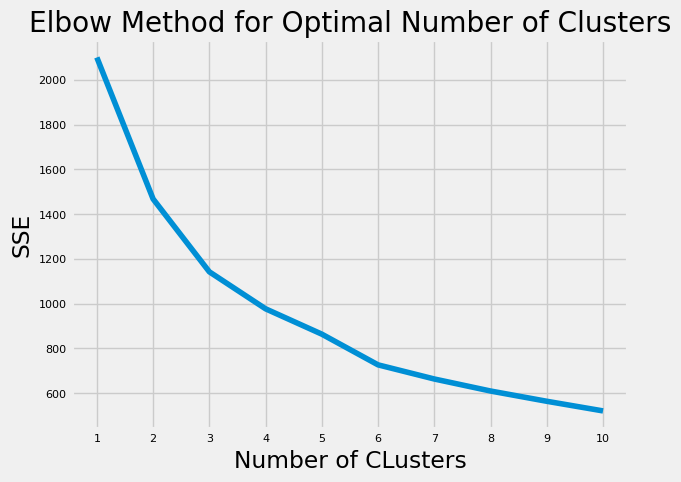

In [ ]:
# Plot the SSE values to find the elbow point
plt.style.use("fivethirtyeight")
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.xlabel("Number of CLusters")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.show()

From the Elbow Method graph, we can observe that the Sum of Squared Errors (SSE) sharply decreases as the number of clusters increases from 1 to 4. After the fourth cluster, the decrease in SSE becomes more gradual, suggesting that the optimal number of clusters for this dataset might be around 4. This point, where the rate of decrease sharply shifts, is typically considered the "elbow," indicating that additional clusters beyond this point have diminishing returns on reducing the SSE.

Finding the Elbow Point with KneeLocator

In [ ]:
# Install the kneed library for identifying the "elbow" point in the SSE plot
%pip install kneed

In [ ]:
# Use KneeLocator to find the elbow point
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print("Elbow point:", kl.elbow)

Elbow point: 3


From the analysis using the KneeLocator, we can see that the elbow point is identified at 3 clusters. This suggests that the optimal number of clusters for our dataset, based on the sum of squared errors (SSE), could be three. This point marks where the SSE curve starts to flatten, indicating a diminishing return on the benefit of adding more clusters.

##### Silhouette Analysis
Silhouette analysis measures the quality of clustering by evaluating how well each point fits within its cluster. It's a useful method to determine the optimal number of clusters by calculating the silhouette score for each instance of k clusters. This score helps identify the degree of separation between clusters, where higher values indicate better-defined clusters. In this section, we'll apply silhouette analysis to further validate our choice of the optimal number of clusters for the dataset.

Calculating Silhouette Coefficients for Different Cluster Counts

In [ ]:
# List to hold the silhouette coefficients for each k
silhouette_coefficients = []

for k in range(2, 11):
  kmeans=KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(df_scaled_k)
  score = silhouette_score(df_scaled_k, kmeans.labels_)
  silhouette_coefficients.append(score)

Silhouette Analysis for Optimal Cluster Identification

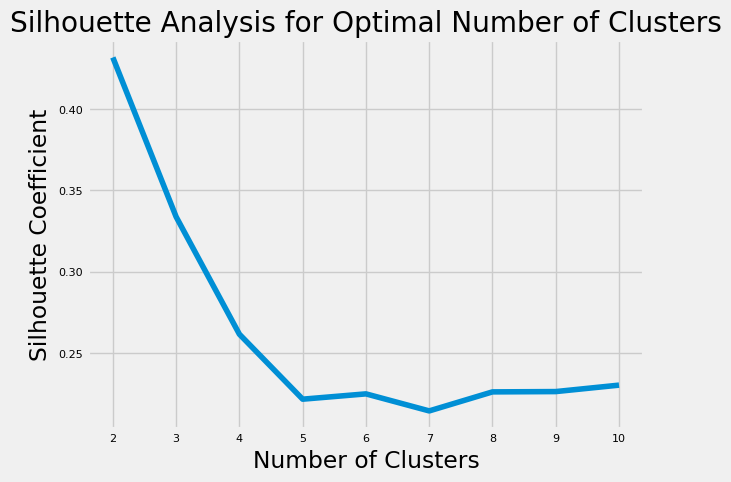

In [ ]:
# Plot the silhouette coefficients to find the optimal number of clusters
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title("Silhouette Analysis for Optimal Number of Clusters")
plt.show()

The Silhouette Analysis chart illustrates the silhouette coefficient for different numbers of clusters ranging from 2 to 10. We observe a sharp decline in the silhouette score as we move from 2 to 4 clusters, indicating that two clusters might be the most appropriate for achieving well-defined and distinct groups within the dataset. Beyond three clusters, the silhouette scores plateau around a lower value, suggesting diminishing returns in cluster separation quality with an increasing number of clusters. This indicates that adding more clusters does not significantly enhance the distinctiveness of the groups, and thus a lower number of clusters might be optimal for meaningful segmentation of the data.

In the K-means clustering section, we standardized the data to ensure equal contribution of features in distance calculations, essential for K-means effectiveness. We explored clustering by experimenting with different numbers of clusters, utilizing the Elbow Method and Silhouette Analysis to determine the optimal number. These methods helped us understand the trade-off between cluster compactness and the number of clusters, suggesting fewer clusters might be more effective. We also evaluated the clusters' properties, such as the number of observations per cluster and centroids, providing insights into the data groups and guiding further analytical decisions.

### ANOVA Analysis of features


In this section, we will use ANOVA (Analysis of Variance) to understand the significance of the differences in average values of various features across the clusters identified in our dataset. ANOVA helps us determine whether the means of different groups are statistically different from each other. This analysis is crucial for validating our clustering results and understanding the key features that differentiate each cluster.

First, let's go over the basic structure of the DataFrame again using df.info(). This helps us to ensure that we understand the layout, data types, and completeness of our dataset before proceeding with the ANOVA analysis.

In [ ]:
# Display information about the DataFrame to understand its structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  300 non-null    float64
 1   total_rooms         300 non-null    float64
 2   total_bedrooms      300 non-null    float64
 3   population          300 non-null    float64
 4   households          300 non-null    float64
 5   median_income       300 non-null    float64
 6   median_house_value  300 non-null    float64
 7   labels              300 non-null    int32  
dtypes: float64(7), int32(1)
memory usage: 17.7 KB


#### Analysis of the significance of the difference in the average values of cluster centers

In this section, we will perform an ANOVA (Analysis of Variance) to test the significance of the differences in the average values of various features across the identified clusters. ANOVA helps determine if the means of different groups are significantly different from each other, which is crucial for understanding the distinct characteristics of each cluster. We will use an alpha value (α) of 0.05 as our significance threshold. If the p-value (PR(>F)) is less than α, we conclude that there is a significant difference between the cluster centers for that feature.


**Housing Median Age**

In [ ]:
# Perform ANOVA to test the significance of the difference in average housing_median_age values across clusters
model = ols('labels ~ housing_median_age', data=df).fit()
print(sm.stats.anova_lm(model, typ=2))

                        sum_sq     df         F    PR(>F)
housing_median_age   14.283281    1.0  7.160904  0.007863
Residual            594.396719  298.0       NaN       NaN


> As PR(>F) < α (0.05), I conclude that there is a significant difference between cluster centers by housing_median_age feature.

**Total Rooms**

In [ ]:
# Perform ANOVA to test the significance of the difference in average total_rooms values across clusters
model = ols('labels ~ total_rooms', data=df).fit()
print(sm.stats.anova_lm(model, typ=2))

                 sum_sq     df          F        PR(>F)
total_rooms   94.904516    1.0  55.046507  1.235300e-12
Residual     513.775484  298.0        NaN           NaN


> As PR(>F) < α (0.05), I conclude that there is a significant difference between cluster centers by total_rooms feature.

**Total Bedrooms**


In [ ]:
# Perform ANOVA to test the significance of the difference in average total_bedrooms values across clusters
model = ols('labels ~ total_bedrooms', data=df).fit()
print(sm.stats.anova_lm(model, typ=2))

                    sum_sq     df          F        PR(>F)
total_bedrooms   54.895998    1.0  29.540412  1.140507e-07
Residual        553.784002  298.0        NaN           NaN


> As PR(>F) < α (0.05), I conclude that there is a significant difference between cluster centers by total_bedrooms feature.`



**Population**

In [ ]:
# Perform ANOVA to test the significance of the difference in average population values across clusters
model = ols('labels ~ population', data=df).fit()
print(sm.stats.anova_lm(model, typ=2))

                sum_sq     df          F    PR(>F)
population   39.037085    1.0  20.421655  0.000009
Residual    569.642915  298.0        NaN       NaN


> As PR(>F) < α (0.05), I conclude that there is a significant difference between cluster centers by population feature.

**Households**

In [ ]:
# Perform ANOVA to test the significance of the difference in average households values across clusters
model = ols('labels ~ households', data=df).fit()
print(sm.stats.anova_lm(model, typ=2))

               sum_sq     df          F        PR(>F)
households   59.62465    1.0  32.361302  3.057348e-08
Residual    549.05535  298.0        NaN           NaN


> As PR(>F) < α (0.05), I conclude that there is a significant difference between cluster centers by households feature.

**Median Income**

In [ ]:
# Perform ANOVA to test the significance of the difference in average median_income values across clusters
model = ols('labels ~ median_income', data=df).fit()
print(sm.stats.anova_lm(model, typ=2))

                   sum_sq     df           F        PR(>F)
median_income  222.304082    1.0  171.456381  2.959642e-31
Residual       386.375918  298.0         NaN           NaN


> As PR(>F) < α (0.05), I conclude that there is a significant difference between cluster centers by median_income feature.

**Median House Value**

In [ ]:
# Perform ANOVA to test the significance of the difference in average median_house_value values across clusters
model = ols('labels ~ median_house_value', data=df).fit()
print(sm.stats.anova_lm(model, typ=2))

                        sum_sq     df           F        PR(>F)
median_house_value  316.042064    1.0  321.832966  2.598704e-49
Residual            292.637936  298.0         NaN           NaN


> As PR(>F) < α (0.05), I conclude that there is a significant difference between cluster centers by median_house_value feature.

**Summary**

In this section, we performed ANOVA to determine if there were significant differences in the average values of various features across the clusters identified by the K-means clustering algorithm. Using an alpha value (α) of 0.05 as our significance threshold, we found the following results:

* Housing Median Age: With a p-value of 0.007863, which is less than α, there is a significant difference between cluster centers for the housing median age feature.

* Total Rooms: The p-value of 1.235300e-12 indicates a significant difference between cluster centers for the total rooms feature.
    
* Total Bedrooms: With a p-value of 1.140507e-07, there is a significant difference between cluster centers for the total bedrooms feature.

* Population: The p-value of 0.000009 suggests a significant difference between cluster centers for the population feature.
    
* Households: With a p-value of 3.057348e-08, there is a significant difference between cluster centers for the households feature.
    
* Median Income: The p-value of 2.959642e-31 indicates a significant difference between cluster centers for the median income feature.

* Median House Value: With a p-value of 2.598704e-49, there is a significant difference between cluster centers for the median house value feature.

From the ANOVA results, we can conclude that there are significant differences in the means of all tested features across the clusters. This indicates that the clusters formed by the K-means algorithm are distinct and have unique characteristics based on the features analyzed.

These insights provide a strong foundation for further analysis and interpretation of the clustering results, allowing us to better understand the underlying structure and distribution of our dataset.

The next section will focus on visualizing the results of the ANOVA analysis to provide a clearer understanding of the differences between clusters.

#### Visualization of ANOVA Results with Box Plots

Following our ANOVA analysis, we'll use box plots to visually represent the data. Box plots efficiently show the distribution, median, and quartiles of each feature across clusters. This section will focus on creating box plots for each feature analyzed to visually affirm the ANOVA results, showcasing differences between clusters and highlighting any outliers or unusual data patterns. This visual aid supports our statistical findings by illustrating how features vary within and between clusters.

**Housing Median Age**

<ipython-input-359-149d8ea850da>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='labels', y='housing_median_age', data=df, palette='spring')


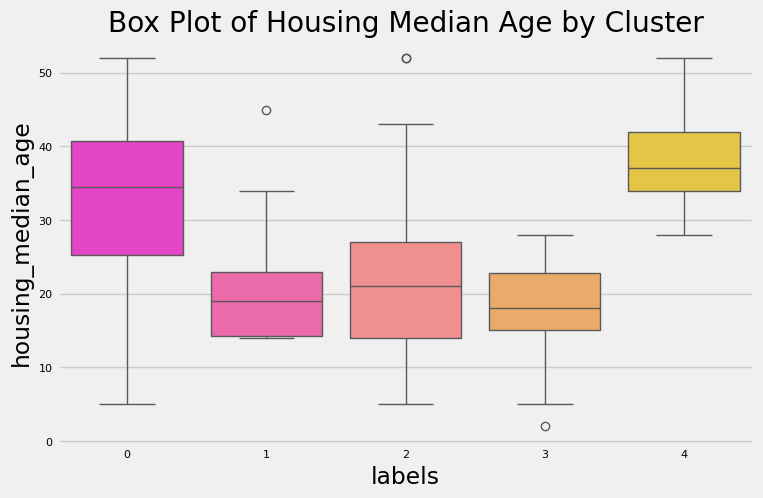

In [ ]:
#### Housing Median Age
# Visualize the distribution of housing_median_age across clusters using a box plot
plt.figure(figsize=(8,5))
sns.boxplot(x='labels', y='housing_median_age', data=df, palette='spring')
plt.title('Box Plot of Housing Median Age by Cluster')
plt.show()

> **Box Plot Analysis for Housing Median Age by Cluster:**

This box plot of housing median age by cluster illustrates the spread and central tendency of the housing ages within each cluster. Notably:

- Cluster 0, represented in pink, shows a broad range of housing ages but is skewed towards older properties, with several outliers suggesting a few exceptionally old units.
- Cluster 1, in lighter pink, contains younger housing on average, with a more compact interquartile range indicating less variance within the cluster.
- Cluster 2, displayed in red, has a median age similar to Cluster 1 but a slightly wider range, indicating a bit more diversity in housing age.
- Cluster 3, in orange, depicts a significant spread in ages, somewhat similar to Cluster 0 but with the median shifted towards younger ages.
- Finally, Cluster 4, in yellow, displays the highest median age, suggesting it primarily consists of older housing.

Overall, the plot provides a clear visual distinction between the clusters based on the ages of the housing, supporting the statistical findings from the ANOVA that suggested significant differences between cluster centers.

**Total Rooms**

<ipython-input-360-319521ac284e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='labels', y='total_rooms', data=df, palette='spring')


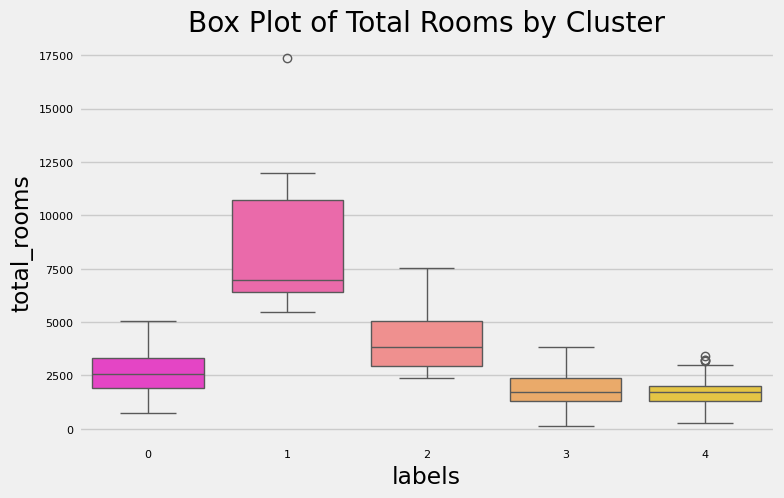

In [ ]:
# Visualize the distribution of total_rooms across clusters using a box plot
plt.figure(figsize=(8,5))
sns.boxplot(x='labels', y='total_rooms', data=df, palette='spring')
plt.title('Box Plot of Total Rooms by Cluster')
plt.show()

> **Box Plot Analysis for Total Rooms by Cluster:**

This box plot visualizes the distribution of total rooms across the five identified clusters. Here are the key observations:

- **Cluster 0:** Features the smallest range of total rooms with a compact interquartile range (IQR). The median is low, indicating smaller housing units predominantly make up this cluster.
- **Cluster 1:** Exhibits a wider range with a higher median, suggesting a moderate variability in room count across its members, indicating a mix of small to medium-sized housing units.
- **Cluster 2:** Shows a lower median with a relatively narrow IQR compared to Cluster 1, consistent with smaller residential units.
- **Cluster 3:** Displays a tight IQR but with an outlier significantly higher than the rest, indicating the presence of a few unusually large properties within this otherwise homogeneous cluster.
- **Cluster 4:** Consists of properties with a consistently higher number of rooms as shown by its higher median and narrow IQR, likely indicating larger housing units.

The presence of outliers in Clusters 1 and 3 highlights the existence of exceptionally large or uniquely structured properties within these groups. This detailed distribution insight, when compared to other clusters, underscores significant variations in the size of housing captured by each cluster, supporting the statistical findings from the ANOVA test that suggested meaningful differences in the average values of total rooms across clusters.

**Total Bedrooms**

<ipython-input-361-e4a1aa9ce6d2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='labels', y='total_bedrooms', data=df, palette='spring')


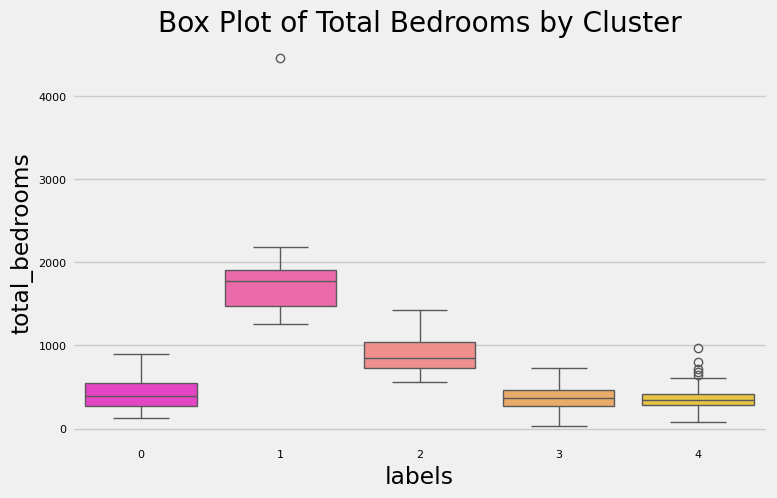

In [ ]:
# Visualize the distribution of total_bedrooms across clusters using a box plot
plt.figure(figsize=(8,5))
sns.boxplot(x='labels', y='total_bedrooms', data=df, palette='spring')
plt.title('Box Plot of Total Bedrooms by Cluster')
plt.show()

> **Box Plot Analysis for Total Bedrooms by Cluster:**

The box plot of total bedrooms by cluster shows distinct variations between the clusters:

- **Cluster 0:** The range of total bedrooms is relatively narrow, with no outliers and a median just below 1000. This cluster represents properties with fewer bedrooms on average.
- **Cluster 1:** Displays a slightly wider range and a median around 1500 bedrooms, indicating a moderate level of bedroom count, with a few properties stretching up to 2000 bedrooms.
- **Cluster 2:** Here, the median is similar to cluster 1 but with a smaller interquartile range. The data points are more tightly grouped, suggesting less variability within this cluster.
- **Cluster 3:** This cluster has a broader range and an elevated median close to 2000, suggesting that properties in this cluster generally have more bedrooms. Notably, there's an outlier far exceeding the typical range, indicating a property with an exceptionally high number of bedrooms.
- **Cluster 4:** Features properties with an average number of bedrooms. The spread is moderate but notably contains an outlier similar to cluster 3, suggesting at least one property with a significantly higher number of bedrooms than typical for this cluster.

These differences reflect the clusters' distinguishing characteristics in terms of bedroom counts, with visible disparities in their typical property sizes. This visualization helps in understanding the distribution and median values of total bedrooms within each cluster, which can be crucial for real estate market analysis or urban planning assessments.

**Population**

<ipython-input-362-5aed91b1864d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='labels', y='population', data=df, palette='spring')


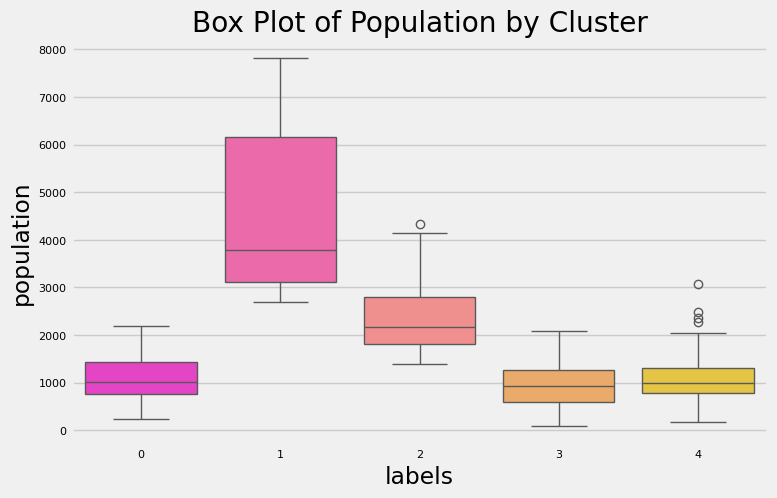

In [ ]:
# Visualize the distribution of population across clusters using a box plot
plt.figure(figsize=(8,5))
sns.boxplot(x='labels', y='population', data=df, palette='spring')
plt.title('Box Plot of Population by Cluster')
plt.show()

> **Box Plot Analysis for Population by Cluster:**

The box plot of population by cluster reveals significant differences in population sizes among the clusters:

- **Cluster 0:** This cluster exhibits the smallest range of population sizes with the lowest medians, indicating areas with low-density populations. The box is narrow, showing that most properties within this cluster have a fairly uniform population size.
- **Cluster 1:** Features a median population size that is slightly higher than cluster 0, yet still maintains a compact interquartile range. There is an outlier, indicating a single property with a substantially higher population than typical for this cluster.
- **Cluster 2:** Shows a wider spread with a median higher than clusters 0 and 1, suggesting areas with moderate population density. The presence of a few outliers above the upper whisker highlights some properties with unusually high populations.
- **Cluster 3:** The population spread in this cluster is broader, with a median significantly higher than the first two clusters, indicating areas of higher population density.
- **Cluster 4:** Displays a distribution similar to cluster 3 but with the median slightly lower. This cluster also includes outliers, suggesting some properties with extremely high population counts.

Overall, these population distributions demonstrate the variability in urban density across the clusters, ranging from sparsely populated to densely populated areas. This information can be valuable for urban planning and resource allocation based on population density patterns.

**Households**

<ipython-input-363-b468ca9097dc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='labels', y='households', data=df, palette='spring')


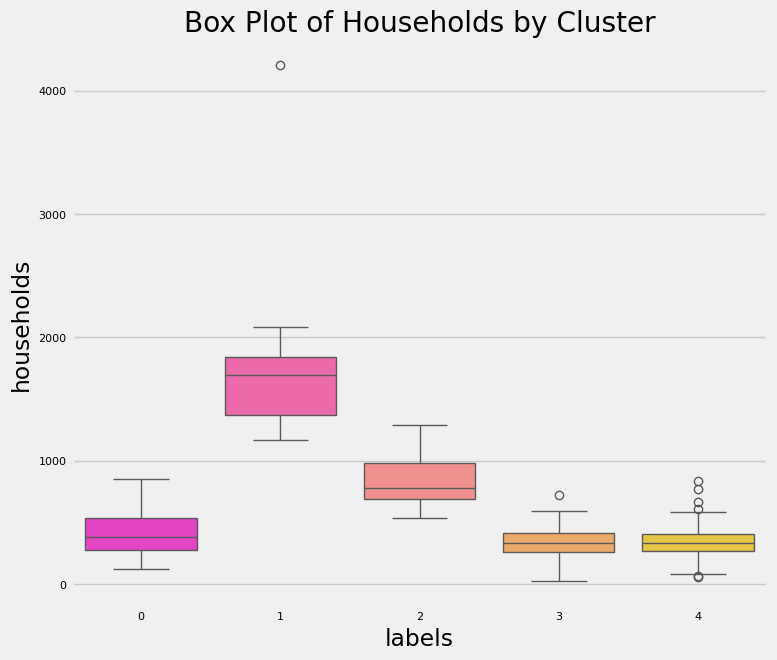

In [ ]:
# Visualize the distribution of households across clusters using a box plot
plt.figure(figsize=(8,7))
sns.boxplot(x='labels', y='households', data=df, palette='spring')
plt.title('Box Plot of Households by Cluster')
plt.show()

> **Box Plot Analysis for Household by Cluster:**

The box plot of households by cluster illustrates the variation in household counts across the different clusters:

* **Cluster 0:** Displays a relatively low range of household counts, with a compact box indicating consistency in the number of households across properties. This cluster represents areas with smaller household numbers.
* **Cluster 1:** Shows a slightly higher median and wider range than cluster 0, but still generally represents areas with fewer households. The distribution is fairly tight, suggesting uniformity in household sizes.
* **Cluster 2:** This cluster has a median that suggests a moderate number of households, with a broader range than the previous clusters. There's a noticeable outlier, indicating a property with a significantly higher number of households.

* **Cluster 3:** Characterized by a broader interquartile range and higher median, cluster 3 indicates areas with a larger number of households per property. The presence of outliers further up suggests some properties with extremely high household counts.
* **Cluster 4:** Similar to cluster 3, this cluster also represents areas with many households. However, it has a slightly lower median and contains more outliers, showing some properties with very high household numbers.

These insights into household distribution can be particularly useful for urban planning and infrastructure development, highlighting clusters with varying residential densities.

**Median Income**

<ipython-input-364-73299b1aff64>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='labels', y='median_income', data=df, palette='spring')


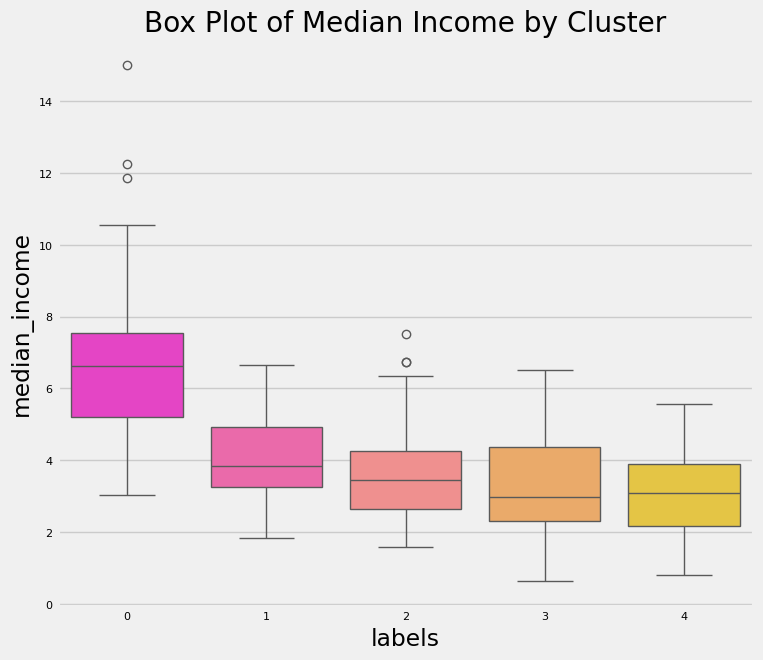

In [ ]:
# Visualize the distribution of median_income across clusters using a box plot
plt.figure(figsize=(8,7))
sns.boxplot(x='labels', y='median_income', data=df, palette='spring')
plt.title('Box Plot of Median Income by Cluster')
plt.show()

> **Box Plot Analysis for Median Income by Cluster:**

The box plot of median income by cluster offers a clear depiction of how income levels are distributed across the identified clusters:

- **Cluster 0:** This cluster displays a high median income with a broad range, indicating a substantial variation in income levels within this group. The presence of outliers further upwards suggests that some areas have exceptionally high incomes.
- **Cluster 1:** Shows a lower median income compared to cluster 0 and a narrower interquartile range. This cluster represents areas with moderately high but more uniform income levels.
- **Cluster 2:** Exhibits a median income that is lower than clusters 0 and 1, with a range that extends from the lower to middle income levels. Few outliers indicate that most areas in this cluster have similar income levels.
- **Cluster 3:** Presents a median income level that's slightly higher than cluster 2, but with a wider range, suggesting a diversity in income levels within the cluster.
- **Cluster 4:** Features the lowest median income among the clusters, with a fairly compact box indicating uniformity in lower income levels across this cluster.

This visualization of median income by cluster is instrumental in understanding economic disparities across different geographical areas, which can be pivotal for targeted economic policies and resource allocation.

**Median House Value**

<ipython-input-365-44f8630e9708>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='labels', y='median_house_value', data=df, palette='spring')


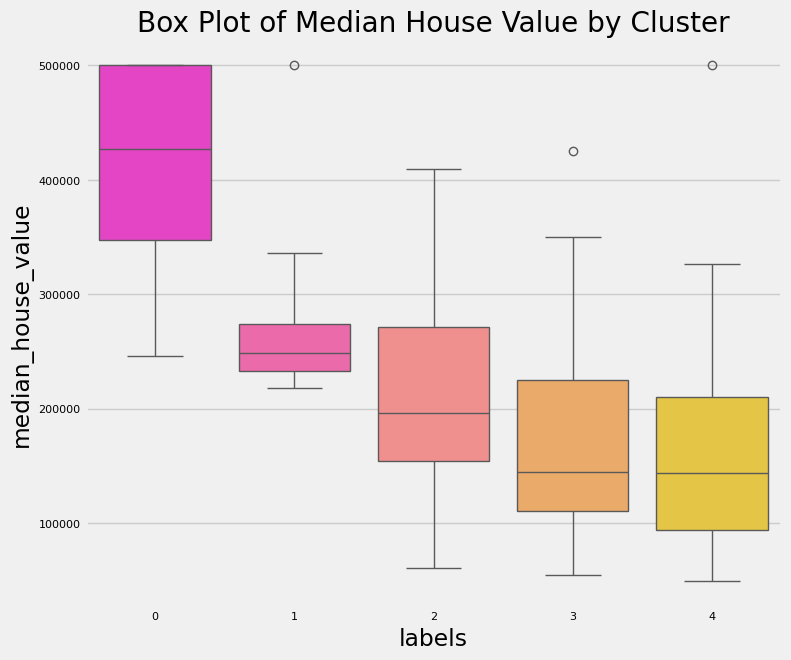

In [ ]:
# Visualize the distribution of median_house_value across clusters using a box plot
import seaborn as sns
plt.figure(figsize=(8,7))
sns.boxplot(x='labels', y='median_house_value', data=df, palette='spring')
plt.title('Box Plot of Median House Value by Cluster')
plt.show()

> **Box Plot Analysis for Median House Value by Cluster:**


The box plot of median house value by cluster illustrates significant variations in property values across different clusters:

- **Cluster 0:** This cluster showcases the highest median house values, with a broad range that extends significantly upwards, suggesting a concentration of high-value properties. The presence of outliers indicates exceptionally high property values above the general cluster range.
- **Cluster 1:** Exhibits substantially lower median house values compared to cluster 0, with a relatively narrow interquartile range. This indicates more uniformity in house prices within this cluster.
- **Cluster 2:** Features median house values that are somewhat lower than cluster 1, with a range that suggests a moderate variation in house prices. The presence of a few outliers above the upper quartile indicates some higher-value properties.
- **Cluster 3:** Displays median house values that are higher than those in clusters 1 and 2, but with a wide range that indicates a diverse mix of property values.
- **Cluster 4:** Represents the cluster with the second highest median house values, displaying a compact interquartile range similar to cluster 1, suggesting uniformity in house prices within this group.

This visualization provides insights into the housing market segmentation by cluster, highlighting how property values vary across different clusters and potentially guiding investment and development strategies.

## Conclusion

In Lab 2, we conducted a thorough exploration and analysis of a housing dataset using hierarchical and k-means clustering techniques. Here is a summary of the steps taken and the key findings from each part of the analysis:

**Data Preparation and Initial Inspection**

We began by inspecting the dataset, which included 300 rows and 7 columns. The columns were numeric and contained no missing values. We then standardized the dataset to ensure that all variables contributed equally to the clustering process.

**Hierarchical Clustering**

We applied hierarchical clustering using four different linkage methods: Ward, Complete, Centroid, and Single linkage. Each method provided different insights into the structure of our data:

  * Ward Linkage: Suggested the presence of 2-3 distinct clusters. This method minimized variance within clusters, creating balanced groups.
  * Complete Linkage: Indicated 3-4 clusters with some differences in distances between data points within clusters.
  * Centroid Linkage: Also suggested 3-4 clusters but showed some spread in the cluster distances.
  * Single Linkage: Highlighted the issue of chaining, where clusters formed long chains of data points, making it difficult to define clear clusters.

After standardizing the data, we repeated the hierarchical clustering analysis. The standardized data produced more balanced and clearly defined clusters across all linkage methods. This reaffirmed the importance of standardization in clustering analysis.

**K-Means Clustering**

We then applied k-means clustering with k=5, based on the insights from hierarchical clustering. The analysis provided:

* Cluster Membership: Each data point was assigned to one of the 5 clusters.

* Cluster Centers: The mean values of each variable for the clusters, giving us a profile for each cluster.

Number of Observations in Clusters: Showed the distribution of data points across the 5 clusters.


** ANOVA Analysis **

To validate the significance of our clusters, we performed ANOVA analysis on the cluster centers:

Significant Differences: We found significant differences in mean values of all variables across clusters. This indicated that the clusters were meaningfully different from each other in terms of housing median age, total rooms, total bedrooms, population, households, median income, and median house value.

*Visualization of ANOVA Results*

We visualized the results using box plots for each variable by cluster:

* Housing Median Age: Cluster 0 showed the highest median age, while Cluster 1 had the lowest.
* Total Rooms: Significant variation was observed, with Cluster 1 having the highest median number of rooms.
* Total Bedrooms: Cluster 1 again showed the highest median values.
* Population: Cluster 1 had the largest population, with a wide range of values.
* Households: Consistent with population, Cluster 1 had the most households.
* Median Income: Cluster 0 showed the highest median income, indicating a wealthier segment.
* Median House Value: Cluster 0 had the highest house values, with significant differences across other clusters.

Summary
*italicized text*In summary, this lab demonstrated the effective use of hierarchical and k-means clustering methods to segment a housing dataset. The standardization process was crucial for achieving balanced and meaningful clusters.

The ANOVA analysis confirmed the significance of the differences between clusters, and the visualizations provided clear insights into the characteristics of each cluster. This comprehensive approach not only enhanced our understanding of the dataset but also provided a robust framework for applying clustering techniques in future data analysis tasks.
